# Проект : Исследование объявлений о продаже квартир

# Описание проекта

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


# Задачи исследования

**Изучение общей информации**
- загрузить данные из файла в датафрейм
- изучить общую информацию о полученном датафрейме
- построить общую гистограмму для всех числовых столбцов таблицы
- изучить информацию в общей гистограмме
- краткий вывод

# Предобработка данных

**Удаление пропусков**
- определить, в каких столбцах есть пропуски
- избавиться от пропущенных значений
- заполнить пропущенные значения там, где это возможно
- указать возможные причины пропусков

**Изменение типов данных**
- проанализировать столбцы с данными
- преобразовать тип данных по необходимости
- указать причины замены данных

**Обработка дубликатов**
- проанализировать столбцы с данными
- произвести устранение дубликатов

**Обработка аномальных значений**
- проанализировать столбцы с данными
- обработать аномалии
- описать обнаруженные особенности

# Добавить в таблицу новые столбцы
- price_m2 цена одного квадратного метра;
- weekday_pub день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- month_pub месяц публикации объявления;
- year_pubгод публикации объявления;
- floor_categoryтип этажа квартиры (значения — «первый», «последний», «другой»);
- cityCenters_nearest_kmрасстояние до центра города в километрах.

# Исследовательский анализ данных

**Изучить параметры обьектов**
- общая площадь 
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- этаж квартиры
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего аэропорта
- расстояние до ближайшего парка
- день и месяц публикации объявления

**Изучить как быстро продавались квартиры**
- произвести анализ данных
- выявить и устранить аномалии
- сделать выводы из полученных данных

**Изучить какие факторы больше всего влияют на общую (полную) стоимость объекта**
Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения 

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**
- осуществить подсчет
- сделать выводы

**Вычислить как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге**
- произвести обработку данных
- произвести вычисления
- сделать выводы

# Общий вывод
- написать общий вывод

## Изучение общей информации

Импортирую библиотеки. Считываю данные из csv-файла в датафрейм и сохраняю в переменную data.

In [1607]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1608]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Вывожу первые 10 строчек датафрейма data.

In [1610]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Вывожу последние 10 строчек датафрейма data.

In [1611]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывожу основную информацию о датафрейме с помощью метода describe().

In [1612]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вывожу основную информацию о датафрейме с помощью метода info().

In [1613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Строю общую гистограмму для всех числовых столбцов таблицы.

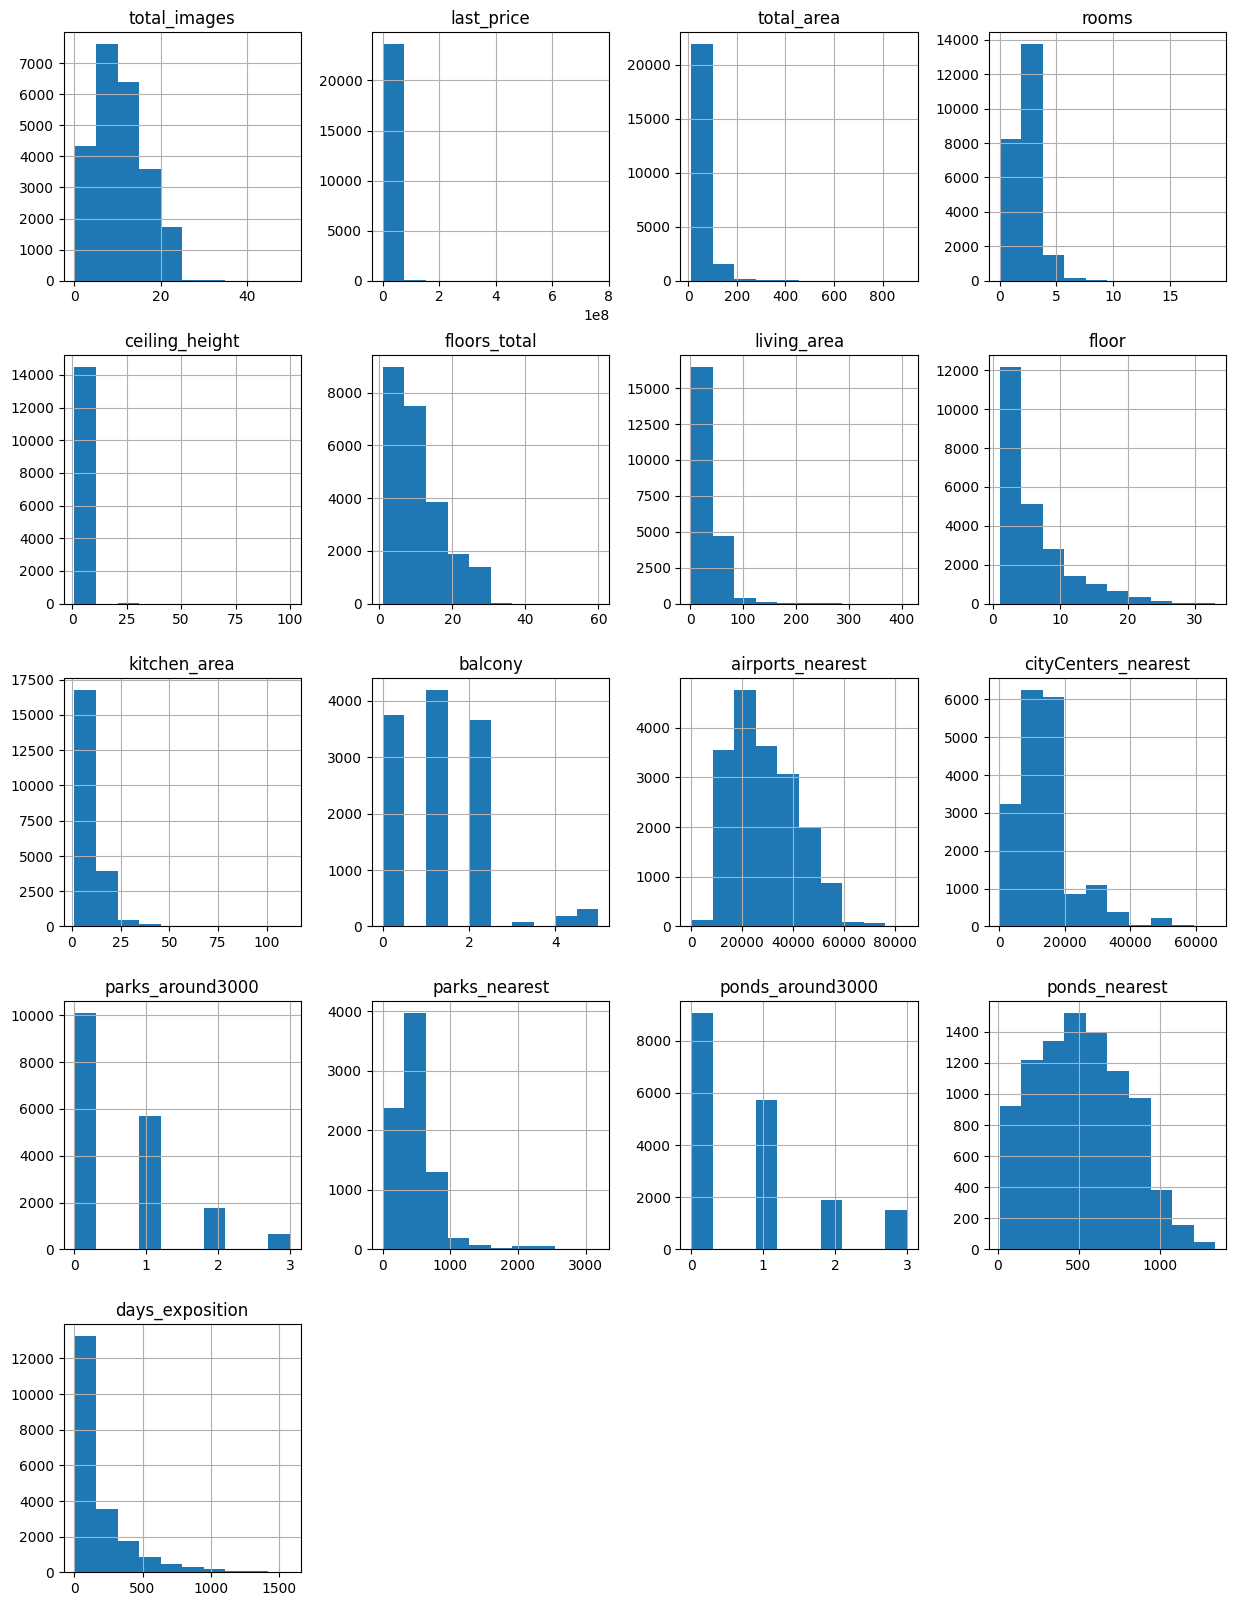

In [1614]:
data.hist(figsize=(15, 20));

После первичного осмотра, видно, что отсутствует очень много значений, некорректный тип данных, а еще есть стометровые потолки, девятнадати комнатные квартиры т.п. Над этими данными необходимо поработать.

## Предобработка данных

Перед предобработкой сохраню первоначальные данные

In [1616]:
old_data = data

### Удаление пропусков

Вывожу информацию о пропущенных значениях  и сортирую по убыванию

In [1617]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Вывожу перечень уникальных значений столбца balcony.

In [1618]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

В столбце balcony меняем пропущенные знаечения на 0.

In [1619]:
data['balcony'] = data['balcony'].fillna(0)

Мы никак не сможем получить данные по столбцу locality_name, если их нет. 
К тому же, таких позиций не так много и их удаление, не окажет особого влияния на общий резутьтат.

В столбце locality_name удаляем пропущенные знаечения.

In [1620]:
data = data.dropna(subset=['locality_name'])

Считаю будет правильным удалить пустые строки по столбцу floors_total.
К тому же, таких позиций не так много и их удаление, не окажет особого влияния на общий резутьтат.

В столбце locality_name удаляем пропущенные знаечения.

In [1621]:
data = data.dropna(subset=['floors_total'])

Если предположить, что столбец is_apartment появился не сначала ведения записей то логичнее будет заполнить пропуски значением False  
В столбце is_apartment меняем пропущенные знаечения на False

In [1622]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [1623]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [1624]:
data['is_apartment'] = data['is_apartment'].fillna(False)

В столбце ceiling_height меняем пропущенные знаечения на median

In [1625]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [1626]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Вывожу количество пропущенных значений для каждого столбца.

In [1627]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15535
ponds_nearest           14529
airports_nearest         5524
cityCenters_nearest      5501
ponds_around3000         5500
parks_around3000         5500
days_exposition          3171
kitchen_area             2222
living_area              1865
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Отсутствие данных могло быть по следующим причинам:**
- *balcony* возможно, что нулевые значения означают, что балконов нет
- *ponds_around3000*, parks_around3000 возможно эти данные выгружены не корректно потому что не нужны в исследовании
- *is_apartment* не все знают разницу между апартаментами и квартирами и просто не заполняли эти данные, либо как вариант, т.к. эти данные не влияют на исследование их просто не предоставили.
- *ponds_nearest*, parks_nearest, airports_nearest, cityCenters_nearest возможно эти данные рассчитываются автоматически и по каим либо причинам не были рассчитаны или выгружены
- *days_exposition* причиной пустых значений либо не корректных, может быть отсутсвие информации по закрытым сделкам либо не своевременное ее предоставление
- *ceiling_height* возможно не все считают эту информаццию важной при продаже квартир, либо просто не хотят проводить замеры
- *kitchen_area, living_area* возмозможно что эти данные не обязательны к заполнению
- *locality_name* возможно невнимательность при заполнении
- *floors_total* веройтней всего эти данные не указали потому что посчитали их ненужными, либо по невнимательности

### Изменение типов данных

Вывожу основную информацию о датафрейме с помощью метода info().

In [1629]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Вывожу первые 10 строчек датафрейма data.

In [1630]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Меняю формат в толбце last_price на datetime

In [1631]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Создаю список столбцов для изменения типа данных

In [1632]:
to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'parks_nearest', 
          'ponds_nearest', 'days_exposition',]

Изменяю типа данных в стобцах на int*

In [1633]:
for col in to_int:
    data[col] = data[data[col].notnull()][col].astype('int')

**Был изменен тип данных:**
- last_price на int, я думаю, что копейки в цене это лишнее
- first_day_exposition приведен к формату datetime
- balcony, floors_total на int, не совсем понятно, как это, десятые части балконов и этажей
- days_exposition на int, здесь также лучше подойдет тип int
- airports_nearest, parks_nearest, ponds_nearest на int, расстояние указано в метрах, сантиметры знать не обязательно

### Обработка дубликатов

Выведем уникальные значения из столбца locality_name

In [1634]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Посчитаем кол-во уникальных значений

In [1635]:
len(data['locality_name'].unique())

364

Избавимся от дублекатов заменив значения в столбце

In [1636]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [1637]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')

In [1638]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

Посчитаем кол-во уникальных значений еще раз

In [1639]:
len(data['locality_name'].unique())

322

### Обработка аномальных значений

Вывожу основную информацию о датафрейме с помощью метода describe().

In [1640]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [1641]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Вывожу информацию о значениях в столбце ceiling_height

In [1642]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [1643]:
data['ceiling_height'].value_counts()

2.65     9758
2.50     3515
2.60     1645
2.70     1571
3.00     1108
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Заменим значения

In [1644]:
data['ceiling_height'] = data['ceiling_height'].replace(25,2.5)

In [1645]:
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)

In [1646]:
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7)

In [1647]:
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)

In [1648]:
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)

In [1649]:
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)

In [1650]:
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)

Уберем значения с потолками выше 7 м

In [1651]:
data = data.query('ceiling_height <= 7 & ceiling_height != 0')

Вывожу информацию о значениях в столбце rooms

In [1652]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [1653]:
data['rooms'].value_counts()

1     8000
2     7895
3     5777
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Уберем кол-во комнат больше 10 и значени с кол-вом комнат 0

In [1654]:
data = data.query('rooms <= 10 & rooms != 0')

Вывожу информацию о значениях в столбце last_price

In [1655]:
data['last_price'].describe()

count    2.335500e+04
mean     6.541089e+06
std      1.059388e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [1656]:
data['last_price'].sort_values(ascending = True ).tail(10)

19865    180000000
8900     190870000
5893     230000000
13749    240000000
16461    245000000
22831    289238400
15651    300000000
1436     330000000
14706    401300000
12971    763000000
Name: last_price, dtype: int32

In [1657]:
data['last_price'].sort_values(ascending = False ).tail(10)

21912    470000
18867    470000
16219    450000
5698     450000
17676    450000
9581     450000
16274    440000
17456    430000
14911    430000
8793      12190
Name: last_price, dtype: int32

<AxesSubplot:>

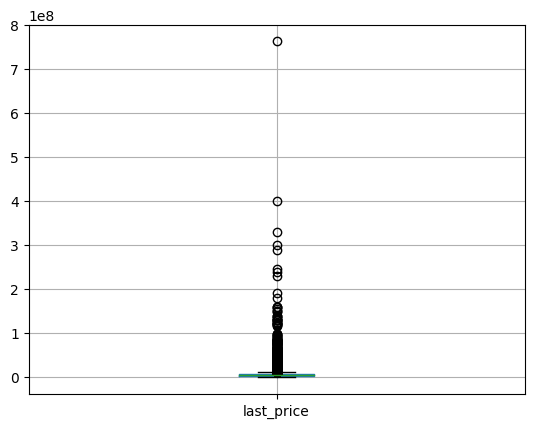

In [1658]:
data.boxplot('last_price') 

Немного обрежем столбец last_price

In [1659]:
data = data.query('last_price <= 100000000 & last_price >= 430000')

Вывожу информацию о значениях в столбце total_area

In [1660]:
data['total_area'].value_counts()

45.00     417
42.00     383
60.00     346
44.00     343
31.00     339
         ... 
30.12       1
147.30      1
63.68       1
54.92       1
55.06       1
Name: total_area, Length: 2101, dtype: int64

In [1661]:
data['total_area'].describe()

count    23318.000000
mean        60.077564
std         33.030699
min         12.000000
25%         40.100000
50%         52.000000
75%         69.800000
max        517.000000
Name: total_area, dtype: float64

In [1662]:
data['total_area'].sort_values(ascending = True ).tail(10)

3676     441.98
20273    460.80
6221     470.30
660      483.90
6621     488.00
22494    491.00
9826     494.10
12401    495.00
8018     507.00
4237     517.00
Name: total_area, dtype: float64

In [1663]:
data['total_area'].sort_values(ascending = False ).tail(10)

22356    17.2
10208    17.0
16949    15.0
12040    15.0
19642    14.0
19558    13.2
19807    13.0
19546    13.0
17961    13.0
19904    12.0
Name: total_area, dtype: float64

<AxesSubplot:>

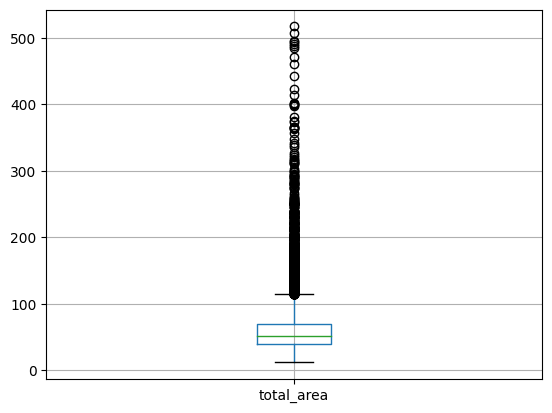

In [1664]:
data.boxplot('total_area') 

In [1665]:
data = data.query('total_area <= 120')

Проверим отброшенное кол-во данных

In [1666]:
data.shape[0] / old_data.shape[0]

0.9413055403181568

6% в пределах нормы

**Особенности в данных**
- ceiling_height предположим что в значениях  25 32 27 24 27.5 22.6 26 не верно указан разделитель или его забыли поставить
- total_area сделал срез данных, чтобы площадь была не больше 120 кв.м
- last_price сделал срез данных, чтобы цена была не выше 100мл
- rooms подкорретировал кол-во комнат, убрал больше 10 и 0, 0 непонятное значение, в случае с аппартаменами это получается 1 комната, больше 10, уже многовато
- еще в ряде столбцов видны аномалии, к ним обратимся на следующих этапах исследования

## Добавить в таблицу новые столбцы

Добавляю столбец цена квадратного метра

In [1668]:
data['price_m2'] = data['last_price'] / data['total_area']

In [1669]:
data['price_m2'] = data['price_m2'].round()

Добавляю столбцы дней недели, месяцев, годов публикации обьявлений

In [1670]:
data['weekday_pub'] = data['first_day_exposition'].dt.weekday

In [1671]:
data['month_pub'] = data['first_day_exposition'].dt.month

In [1672]:
data['year_pub'] = data['first_day_exposition'].dt.year

Добавляю столбец категории этажей

In [1673]:
def fl(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [1674]:
data['floor_category'] = data.apply(fl, axis = 1)

Создаю дополнительный столбец для расстояния cityCenters_nearest в км

In [1675]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

## Исследовательский анализ данных

### Изучить параметры обьектов

In [1677]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_pub,month_pub,year_pub,floor_category,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.028
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,18.603
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,13.933
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.098
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95066.0,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99196.0,3,11,2017,другой,19.143
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545.0,3,4,2019,другой,11.634
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87455.0,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0,6,2,2017,другой,15.008
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.0,3,11,2017,другой,13.878


#### Общая площадь

Строю гистограмму для столбца total_area

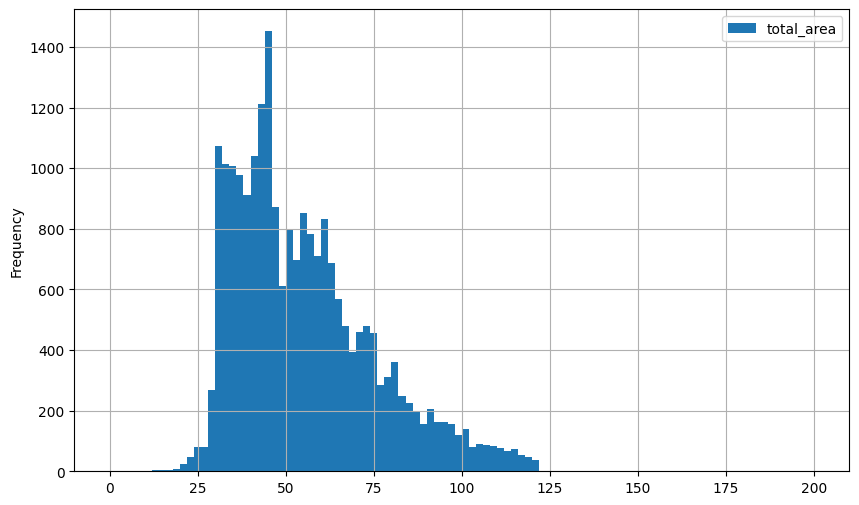

In [1678]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,200));

In [1679]:
data['total_area'].describe()

count    22308.000000
mean        55.069772
std         19.978912
min         12.000000
25%         40.000000
50%         50.800000
75%         66.100000
max        120.000000
Name: total_area, dtype: float64

#### Жилая площадь

Строю гистограмму для столбца living_area

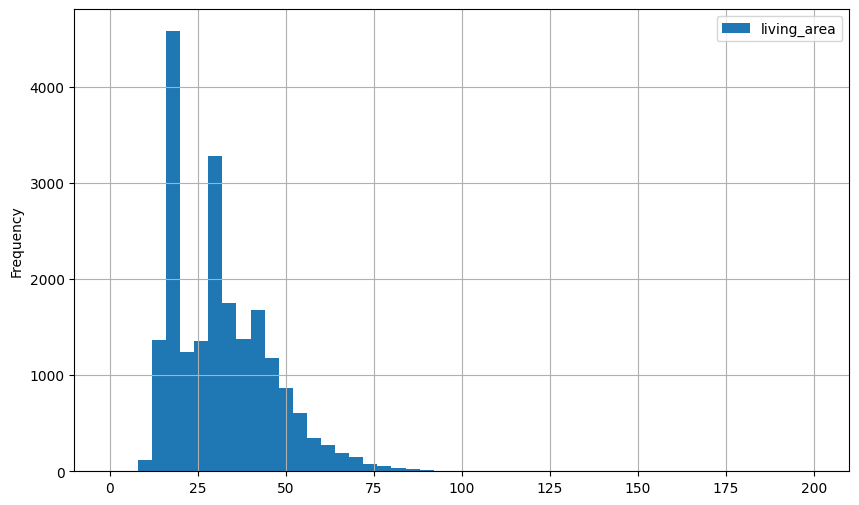

In [1680]:
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (10,6), range = (0,200));

In [1681]:
data['living_area'].describe()

count    20567.000000
mean        31.470943
std         13.869130
min          2.000000
25%         18.400000
50%         30.000000
75%         40.700000
max        101.000000
Name: living_area, dtype: float64

#### Площадь кухни

Строю гистограмму для столбца kitchen_area

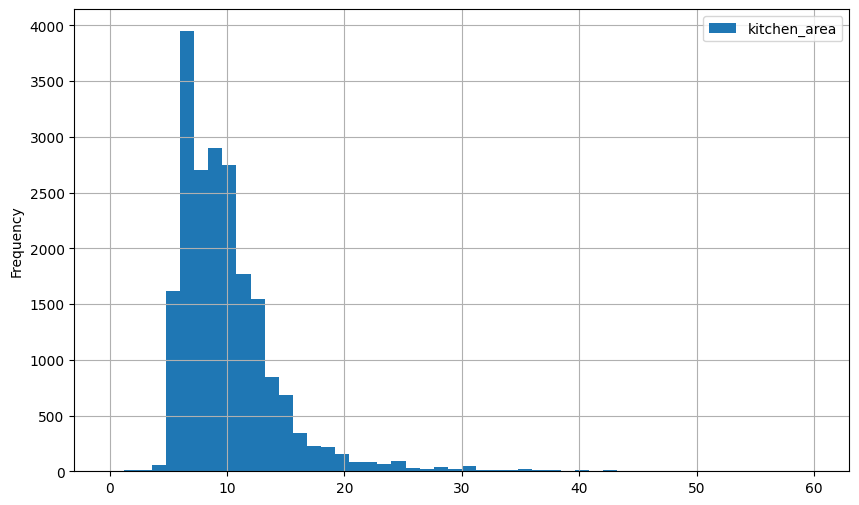

In [1682]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (10,6), range = (0,60));

In [1683]:
data['kitchen_area'].describe()

count    20380.000000
mean         9.972349
std          4.496356
min          1.300000
25%          7.000000
50%          9.000000
75%         11.360000
max         64.000000
Name: kitchen_area, dtype: float64

#### Цена обьекта

Строю гистограмму для столбца last_price

In [1684]:
data_last_price = data['last_price'] / 1000000

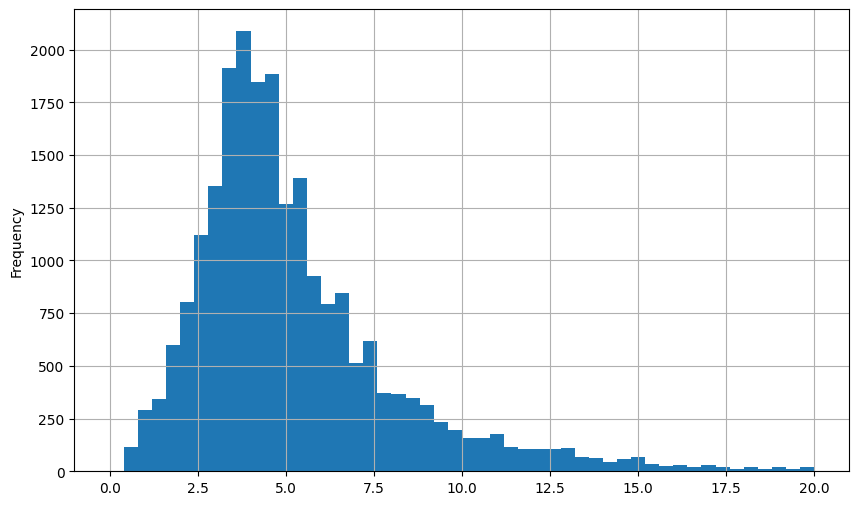

In [1685]:
data_last_price .plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (10,6), range = (0,20));

In [1686]:
data['last_price'].describe()

count    2.230800e+04
mean     5.400705e+06
std      3.549532e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.400000e+06
max      8.200000e+07
Name: last_price, dtype: float64

#### Колличество комнат

Строю гистограмму для столбца rooms

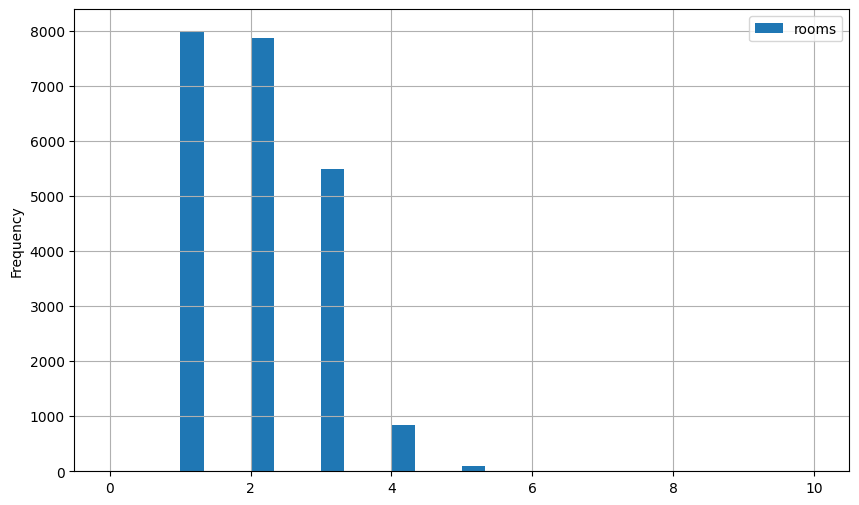

In [1687]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (10,6), range = (0,10));

In [1688]:
data['rooms'].describe()

count    22308.000000
mean         1.978035
std          0.894969
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

#### Высота потолков

Строю гистограмму для столбца ceiling_height

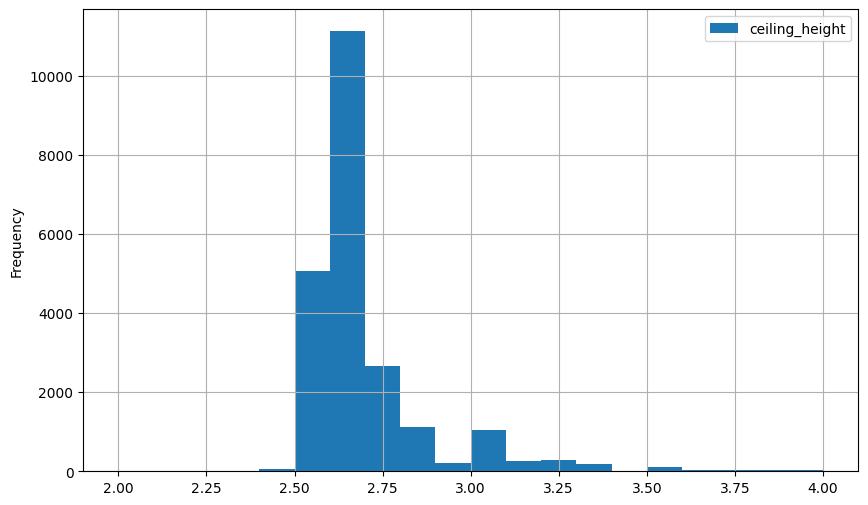

In [1689]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (10,6), range = (2,4));

In [1690]:
data['ceiling_height'].describe()

count    22308.000000
mean         2.681458
std          0.194408
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.300000
Name: ceiling_height, dtype: float64

#### Этаж квартиры

Строю гистограмму для столбца floor

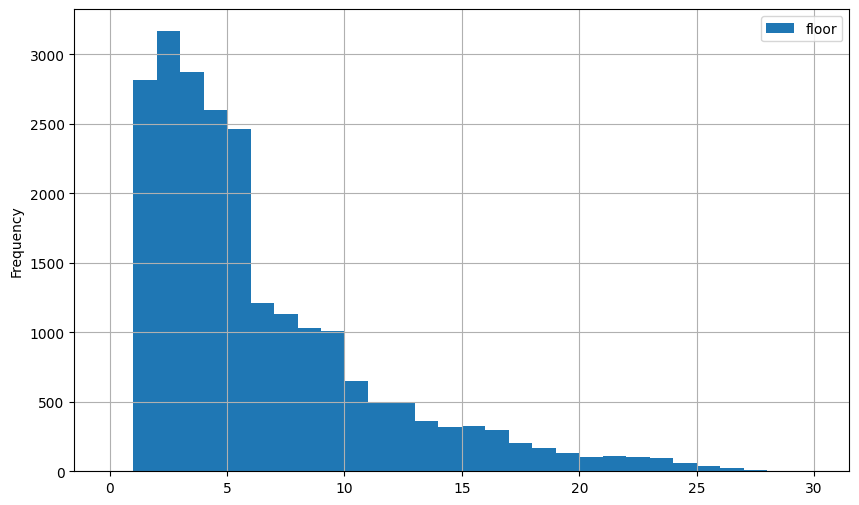

In [1691]:
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (10,6), range = (0,30));

In [1692]:
data['floor'].describe()

count    22308.000000
mean         5.877309
std          4.876652
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

#### Тип этажа квартиры

Создаю сводную таблицу

In [1693]:
data_floor_cat = data.pivot_table (index='floor_category', values = 'last_price', aggfunc='count')


In [1694]:
data_floor_cat

,last_price
floor_category,
другой,16396
первый,2818
последний,3094


Строю гистограмму сводной таблицы data_floor_cat

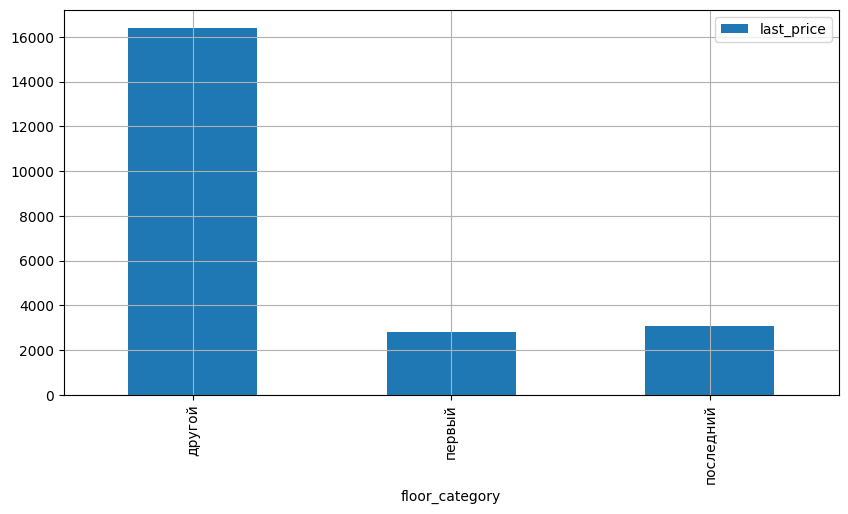

In [1695]:
data_floor_cat.plot(y='last_price', grid=True, kind='bar', figsize=(10,5));

In [1696]:
# data_floor_cat.plot(y = 'last_price', kind = 'pie',  autopct = '%.1f', figsize = (8,8))

In [1697]:
data['floor_category'].describe()

count      22308
unique         3
top       другой
freq       16396
Name: floor_category, dtype: object

#### Общее кол-во этажей в дома

Строю гистограмму для столбца total_area

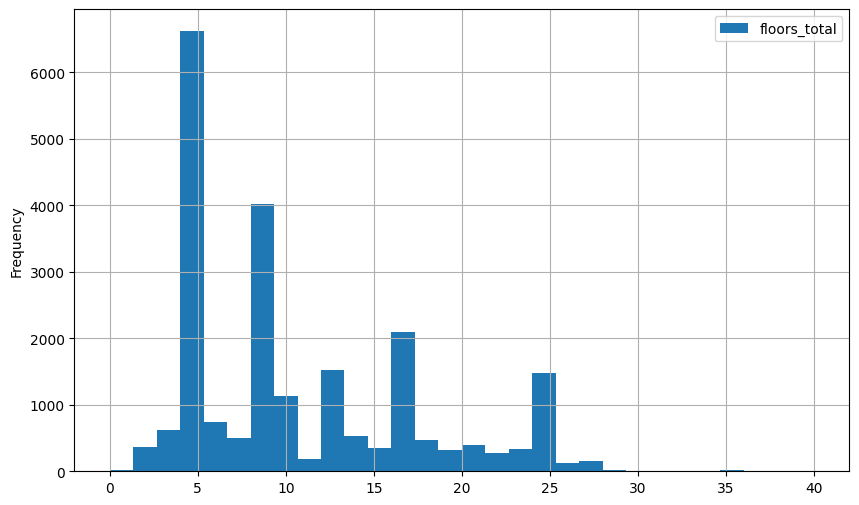

In [1698]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (10,6), range = (0,40));

In [1699]:
data['floors_total'].describe()

count    22308.000000
mean        10.732069
std          6.606798
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

#### Расстояние до центра города в метрах

Строю гистограмму для столбца total_area

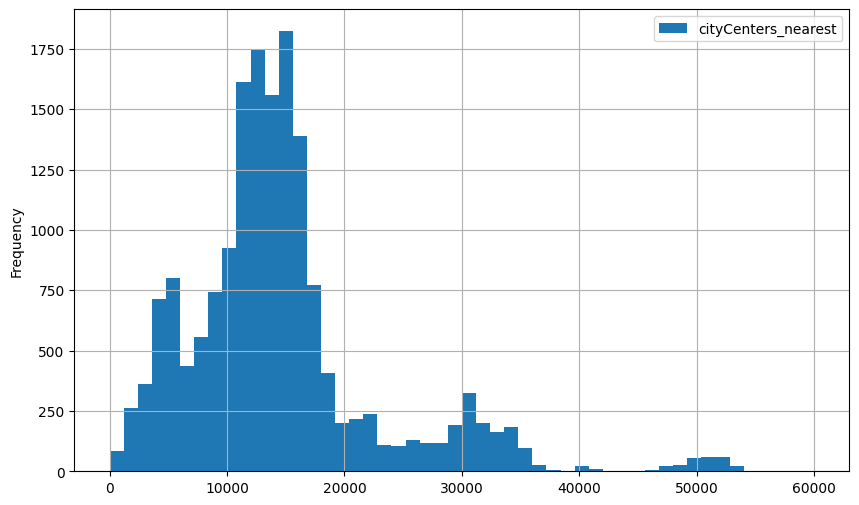

In [1700]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True, figsize = (10,6), range = (0,60000));

In [1701]:
data['cityCenters_nearest'].describe()

count    16919.000000
mean     14582.968792
std       8548.361574
min        208.000000
25%       9978.000000
50%      13322.000000
75%      16465.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

#### Расстояние до ближайшего аэропорта

Строю гистограмму для столбца total_area

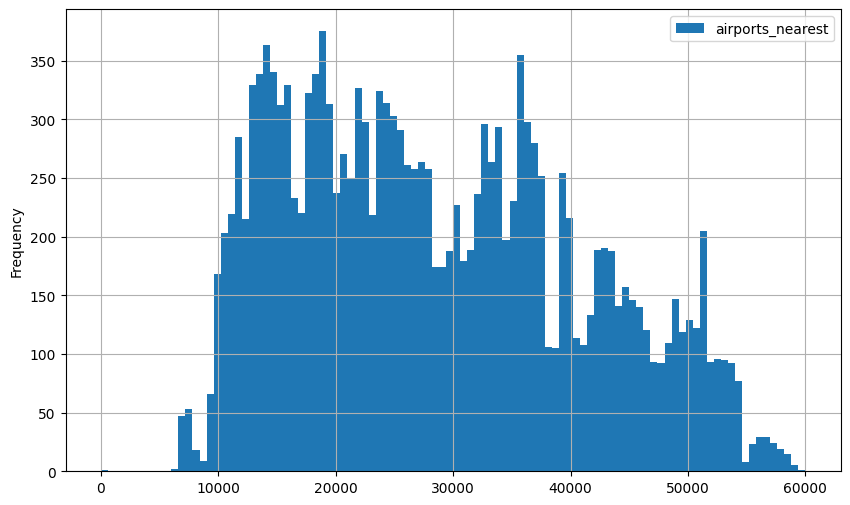

In [1702]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,60000));

In [1703]:
data['airports_nearest'].describe()

count    16900.000000
mean     28885.366213
std      12814.654738
min          0.000000
25%      18349.000000
50%      27001.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

#### Расстояние до ближайшего парка

Строю гистограмму для столбца total_area

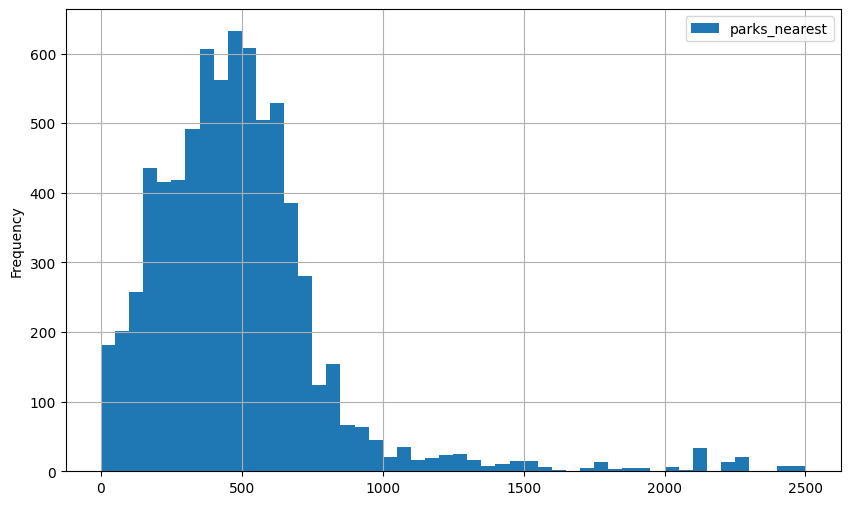

In [1704]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (10,6), range = (0,2500));

In [1705]:
data['parks_nearest'].describe()

count    7314.000000
mean      494.409899
std       344.216502
min         1.000000
25%       288.000000
50%       456.000000
75%       615.750000
max      3190.000000
Name: parks_nearest, dtype: float64

#### День и месяц публикации объявления

Создаю сводную таблицу

In [1706]:
data_mons = data.pivot_table (index='month_pub', values = 'last_price', aggfunc='count')

In [1707]:
data_mons.sort_values('last_price')

,last_price
month_pub,
5,1185
1,1407
12,1541
7,1581
8,1650
6,1666
9,1856
10,2011
11,2215


Строю гистограмму для столбца total_area

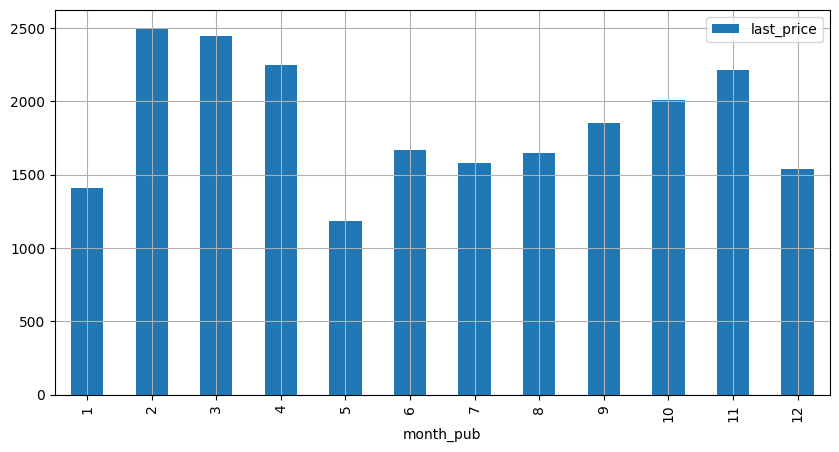

In [1708]:
data_mons.plot(y='last_price', grid=True, kind='bar', figsize=(10,5));

In [1709]:
#data_mons.plot(y = 'last_price', kind = 'pie',  autopct = '%.1f', figsize = (9,9))

Создаю сводную таблицу

In [1710]:
data_days = data.pivot_table (index='weekday_pub', values = 'last_price', aggfunc='count')

In [1711]:
data_days.sort_values('last_price')

,last_price
weekday_pub,
6,1606
5,1833
0,3416
2,3718
4,3775
1,3958
3,4002


Строю гистограмму для столбца total_area

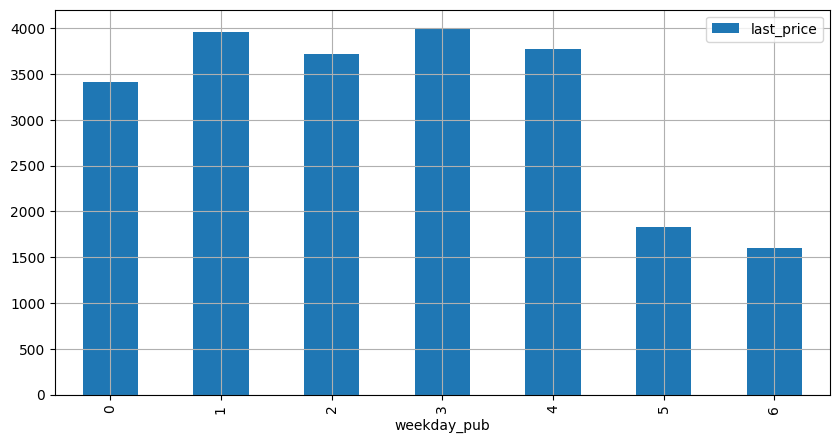

In [1712]:
data_days.plot(y='last_price', grid=True, kind='bar', figsize=(10,5));

In [1713]:
# data_days.plot(y = 'last_price', kind = 'pie', autopct = '%.1f', figsize = (9,9))

**Наблюдения:**

- **общая площадь:** Больше всего продают квартиры с площадью от 30 до 75 кв.м., имеются квартиры размером 900, но их можно отнести к выбросам. 
- **жилая площадь:** Основной обьем продаж приходится на квартиры с жилой площадью от 15 до 50 кв.м., на гистограмме видны два пика, по ним видно, что наибольшей популярностью пользуются квартиры с жилой площадью 20 и 30 кв.м.
- **площадь кухни** Больше всего продают квартир где размер кухни от 5 до 14 кв.м., больше всего же квартир продают с кухнями рамером 6 кв.м
- **цена объекта:** Основная стоимость продаваемых квартир составляет от 3млн. до 15млн., большую часть продаж составляют квартиры с ценой порядка 3млн., 7млн.
- **количество комнат:** В основном продают квартиры 1 - 2 комнатные, немного меньшей популярностью пользуются квартиры 3х комнатные, и совсем мало продаются 4ех комнатные квартиры. Квартир с комнатами больше 4ех совсем немного.
- **высота потолков:** Большинство продаваемых квартир имеют потолки от 2.50м до 2.80. Больше всего продают квартиры с высотой потолков 2.60. 
- **этаж квартиры:** Больше всего спросом пользуются квартиры на 2ом - 6ом этажах.
- **тип этажа квартиры («первый», «последний», «другой»):** Как показывает практика, люди не любят покупать квартиры на первом и последнем этажах. Как показывает график 73.5% продаж приходятся на этажи отличные от первого и последнего.
- **общее количество этажей в доме:** Как и следовало ожидать больше всего покупают квартиры в домах со стандартной этажностью (5, 9, 12, 16, 24). Больше всего продается квартир в 5ти этажных домах.
- **расстояние до центра города в метрах:** Основная доля продаж приходится на квартиры находящиеся на расстоянии 11-17 км. от центра, думаю это в основном связано со стоимостью квартир в центре. Однако в 5км от центра жилье, менее, но популярно.
- **расстояние до ближайшего аэропорта:** Судя по графику данный фактор не особо влияет на покупку квартир, единственно, на удаленности 40км от аэропорта, популярность квартир начинает идти на спад.
- **расстояние до ближайшего парка:** Люди предпочитают квартиры, чтобы в ближайших 500ах метрах находился парк.
- **день и месяц публикации объявления:** Судя по диаграммам, нет особой разницы в какой день недели или в каком месяце осуществлять покупку. Чуть интенсивней продажи идут в феврале, марте, апреле. Видимо люди планировали новую серьезную покупку целый год, и сразу, как год начался решили ее осуществить, ну или просто совпадение. В субботу и в воскресенье также заметна просадка по прдажам, видимо это связано с выходными, не все работают.

### Изучить как быстро продавались квартиры

In [1716]:
data['days_exposition'].describe()

count    19427.000000
mean       176.236321
std        214.332035
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

Строим диаграмму размаха для days_exposition

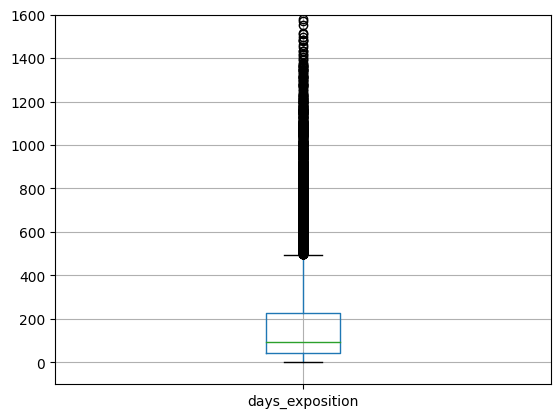

In [1717]:
plt.ylim(-100,1600)
data.boxplot('days_exposition');

 Видно что после 500 начинаются выбросы

Строим гистограмму для days_exposition с колличеством корзин 100 и значением от 0 до 500

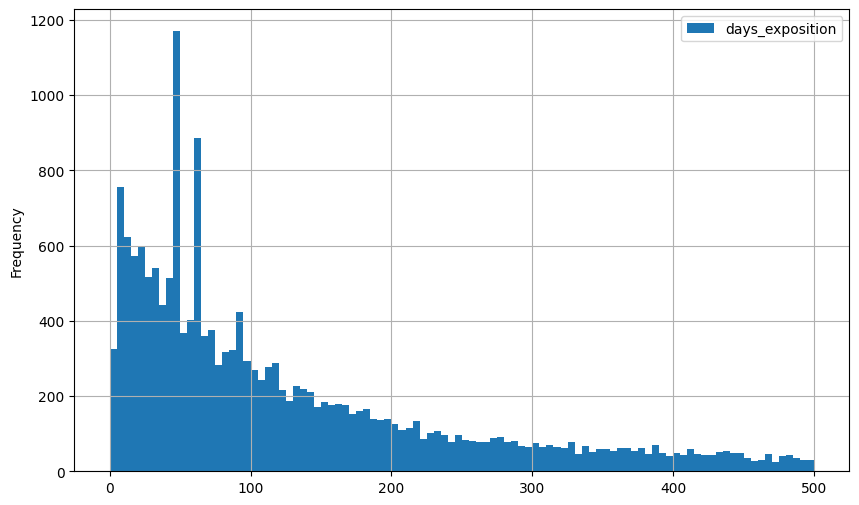

In [1718]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,500));

На гистограмме видны аномалии

Методом value_counts найдем аномальные значения

In [1719]:
data['days_exposition'].value_counts()

45.0      866
60.0      531
7.0       225
30.0      196
4.0       168
         ... 
1226.0      1
1021.0      1
1265.0      1
1104.0      1
986.0       1
Name: days_exposition, Length: 1106, dtype: int64

Обнаружены следующие значения 7, 30, 45, 60, 90. Согласно информации с сайта https://yandex.ru/support/realty/owner/home/add-ads-housing.html, можно определить, что значения не являются выбросами, а являються особенностью функционирования системы размещенияданные.

In [1720]:
data_days_exposition_true = data.query('days_exposition != 0 & days_exposition <= 500')

Выводим новую статистику после удаления аномалий

In [1722]:
data_days_exposition_true['days_exposition'].describe()

count    17863.000000
mean       125.687119
std        118.355101
min          1.000000
25%         41.000000
50%         83.000000
75%        179.000000
max        500.000000
Name: days_exposition, dtype: float64

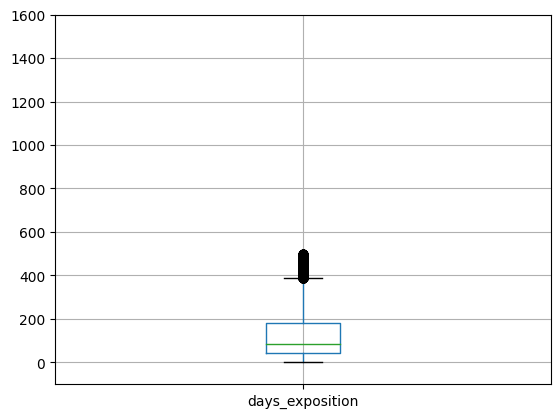

In [1723]:
plt.ylim(-100,1600)
data_days_exposition_true.boxplot('days_exposition');

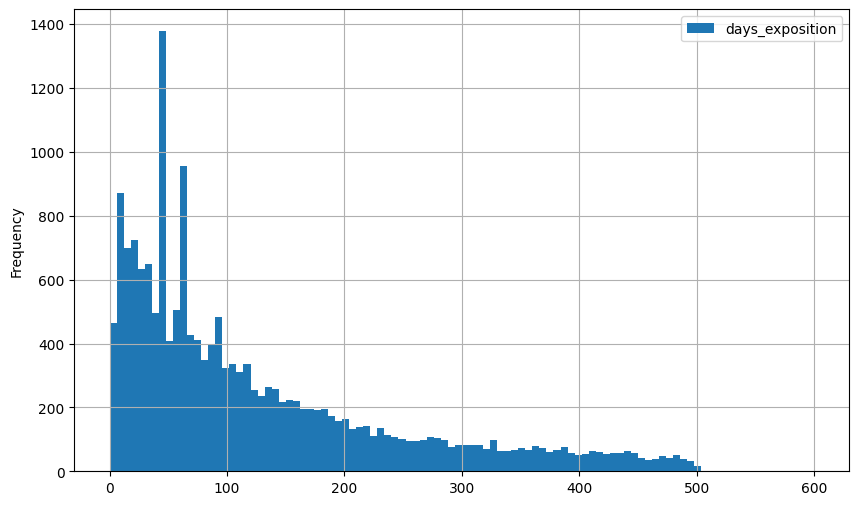

In [1724]:
data_days_exposition_true.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,600));

Таким образом, можно сказать, что, нормальным временем продажи квартир можно считать 120 дней с момента бубликации обьявления. Если продажа осуществлена в течении 40 дней, то ее можно считать быстрой. Продажу можно считать долгой если квартира продается 180 дней и выше, необычно долгой, если 500 дней и выше.

### Изучить какие факторы больше всего влияют на общую (полную) стоимость объекта

In [1726]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_pub,month_pub,year_pub,floor_category,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,13.933
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.098
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95066.0,0,9,2018,другой,NaN


#### Изучим зависимость цены от общей площади квартиры

Формируем сводную таблицу, выводим полученные значения, строим график зависимости, выводим коэффициент корреляции

In [1727]:
pivot_table_total_area = data.pivot_table(index = 'total_area', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_total_area.columns = ['mean', 'count', 'median']

In [1728]:
pivot_table_total_area.head(5)

,mean,count,median
total_area,,,
12.0,2400000.0,1,2400000.0
13.0,2350000.0,3,1850000.0
13.2,1686000.0,1,1686000.0
14.0,1190000.0,1,1190000.0
15.0,1725000.0,2,1725000.0


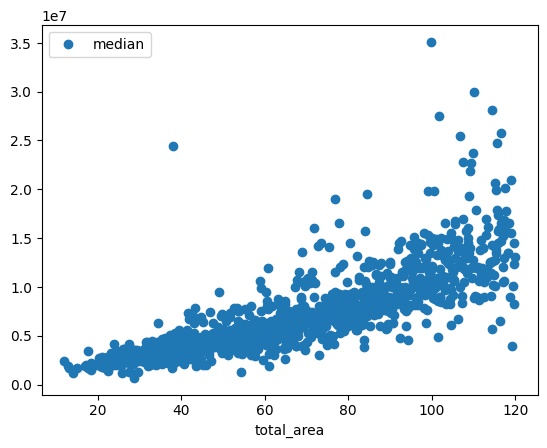

In [1729]:
pivot_table_total_area.plot(y = 'median', style = 'o');

In [1730]:
data['total_area'].corr(data['last_price'])

0.6914841288397819

Зависимость существенная, чем выше площадь тем выше цена.

#### Изучим зависимость цены от жилой площади квартиры

Формируем сводную таблицу, выводим полученные значения, строим график зависимости, выводим коэффициент корреляции

In [1731]:
pivot_table_living_area = data.pivot_table(index = 'living_area', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_living_area.columns = ['mean', 'count', 'median']

In [1732]:
pivot_table_living_area.head(5)

,mean,count,median
living_area,,,
2.0,6350000.0,1,6350000.0
3.0,4440000.0,1,4440000.0
5.4,6100000.0,1,6100000.0
6.0,3799000.0,1,3799000.0
6.5,4050000.0,1,4050000.0


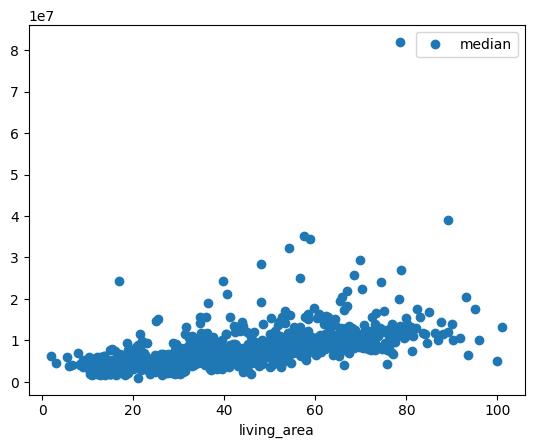

In [1733]:
pivot_table_living_area.plot(y = 'median', style = 'o');

In [1734]:
data['living_area'].corr(data['last_price'])

0.5624586926861722

Существенно зависит, чем больше жилая площадь тем выше цена.

#### Изучим зависимость цены от площади кухни квартиры

Формируем сводную таблицу, выводим полученные значения, строим график зависимости, выводим коэффициент корреляции

In [1735]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_kitchen_area.columns = ['mean', 'count', 'median']

In [1736]:
pivot_table_kitchen_area.head(5)

,mean,count,median
kitchen_area,,,
1.30,4.250000e+06,1,4250000.0
2.00,2.821429e+06,7,2720000.0
2.30,2.940000e+06,1,2940000.0
2.40,2.200000e+06,1,2200000.0
2.89,5.967734e+06,1,5967734.0


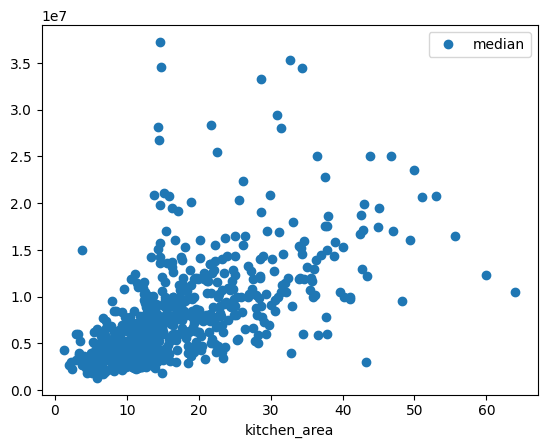

In [1737]:
pivot_table_kitchen_area.plot(y = 'median', style = 'o');

In [1738]:
data['kitchen_area'].corr(data['last_price'])

0.5353700669372768

Существенно зависит, общая стоимость увеличивается с размером кухни

#### Изучим зависимость цены от кол-ва комнат квартиры

Формируем сводную таблицу, выводим полученные значения, строим график зависимости, выводим коэффициент корреляции

In [1739]:
pivot_table_rooms = data.pivot_table(index = 'rooms', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_rooms.columns = ['mean', 'count', 'median']

In [1740]:
pivot_table_rooms

,mean,count,median
rooms,,,
1,3.817642e+06,7995,3600000
2,5.479981e+06,7869,4750000
3,7.122938e+06,5498,6000000
4,8.048235e+06,843,7400000
5,8.322815e+06,92,8500000
6,1.091450e+07,10,11100000
7,1.349000e+07,1,13490000


In [1741]:
pivot_table_rooms = pivot_table_rooms.query('count > 100')

In [1742]:
pivot_table_rooms

,mean,count,median
rooms,,,
1,3.817642e+06,7995,3600000
2,5.479981e+06,7869,4750000
3,7.122938e+06,5498,6000000
4,8.048235e+06,843,7400000


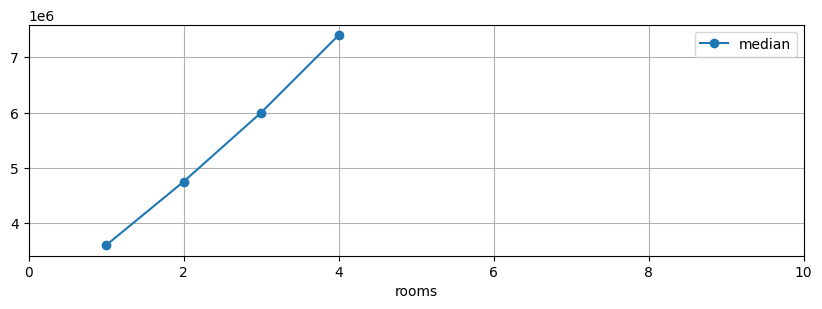

In [1743]:
pivot_table_rooms.plot(y = 'median', style='o-', xlim=(0,10), grid=True, figsize=(10, 3));

In [1744]:
data['last_price'].corr(data['rooms'])

0.3902828129378562

Зависисмость существует

#### Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

Формируем сводную таблицу, выводим полученные значения, строим график зависимости

In [1745]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_floor_category.columns = ['mean', 'count', 'median']

In [1746]:
pivot_table_floor_category

,mean,count,median
floor_category,,,
другой,5.663828e+06,16396,4700000
первый,4.335910e+06,2818,3850000
последний,4.976150e+06,3094,4150000


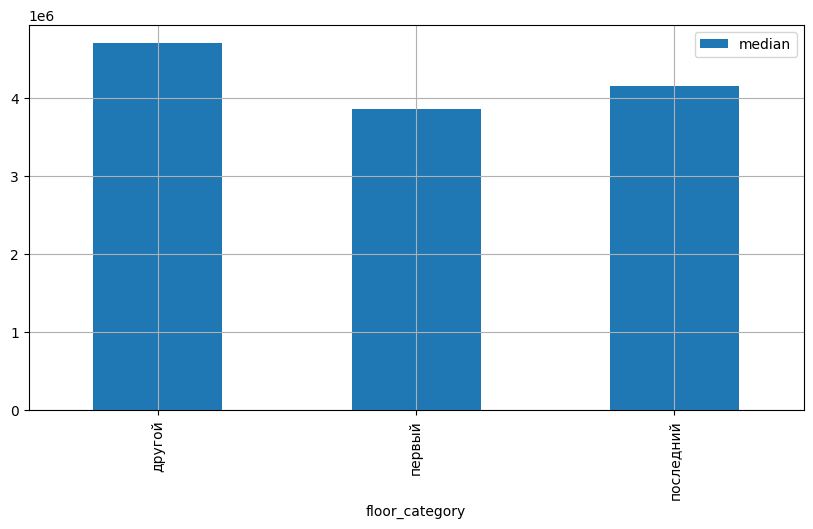

In [1747]:
pivot_table_floor_category.plot(y='median', grid=True, kind='bar', figsize=(10,5));

Общая стоимость не сильно зависит от этажа, однако для первого и последнего, она немного ниже

#### Изучим зависимость цены от даты размещения (день недели, месяц, год).

**Дни недели**

Формируем сводную таблицу, выводим полученные значения, строим график зависимости

In [1748]:
pivot_table_weekday_pub = data.pivot_table(index = ['weekday_pub'],
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_weekday_pub.columns = ['mean', 'count', 'median']

In [1749]:
pivot_table_weekday_pub

,mean,count,median
weekday_pub,,,
0,5.393896e+06,3416,4550000
1,5.473227e+06,3958,4645000
2,5.412825e+06,3718,4572500
3,5.487786e+06,4002,4500000
4,5.373878e+06,3775,4500000
5,5.231078e+06,1833,4500000
6,5.248061e+06,1606,4500000


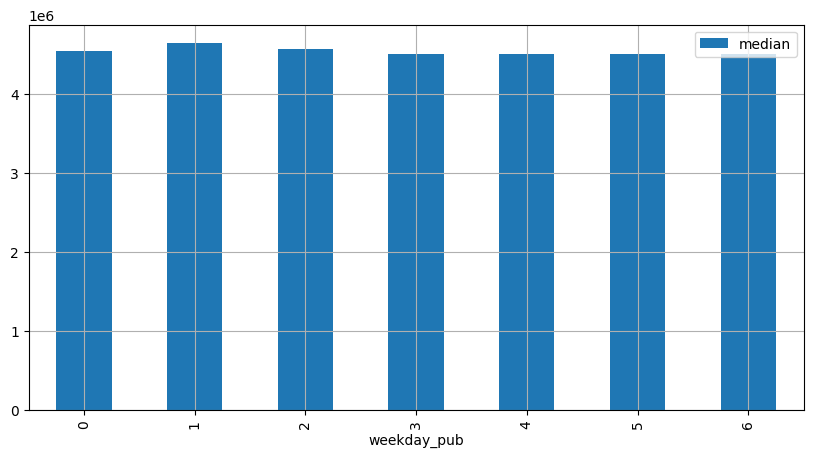

In [1750]:
ylims=(5000, 10000)
pivot_table_weekday_pub.plot(y='median', grid=True, kind='bar', figsize=(10,5));

Не увидел здесь существенной зависимости.

**Месяцы**

Формируем сводную таблицу, выводим полученные значения, строим график зависимости

In [1751]:
pivot_table_month_pub = data.pivot_table(index = 'month_pub', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_month_pub.columns = ['mean', 'count', 'median']

In [1752]:
pivot_table_month_pub

,mean,count,median
month_pub,,,
1,5.447905e+06,1407,4500000
2,5.392122e+06,2499,4550000
3,5.359259e+06,2448,4550000
4,5.510403e+06,2249,4700000
5,5.244253e+06,1185,4430000
6,5.281068e+06,1666,4300000
7,5.321690e+06,1581,4500000
8,5.471850e+06,1650,4500000
9,5.529773e+06,1856,4600000


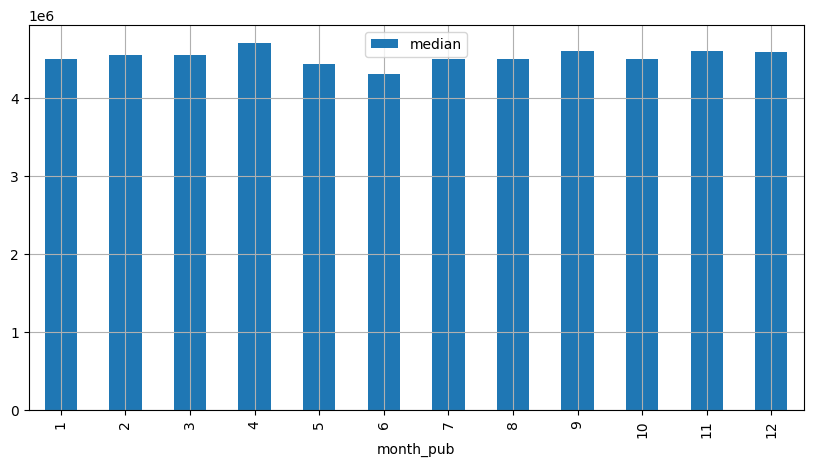

In [1753]:
ylims=(5000, 10000)
pivot_table_month_pub.plot(y='median', grid=True, kind='bar', figsize=(10,5));

Не увидел здесь существенной зависимости.

**Года**

Формируем сводную таблицу, выводим полученные значения, строим график зависимости

In [1754]:
pivot_table_year_pub = data.pivot_table(index = 'year_pub', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median']
                                          )

pivot_table_floor_year_pub = ['mean', 'count', 'median']

In [1755]:
pivot_table_year_pub

,mean,count,median
,last_price,last_price,last_price
year_pub,,,
2014,8.407453e+06,110,6200000
2015,6.032776e+06,1053,5000000
2016,5.351497e+06,2584,4390000
2017,5.292554e+06,7693,4400000
2018,5.279929e+06,8132,4500000
2019,5.746100e+06,2736,4972500


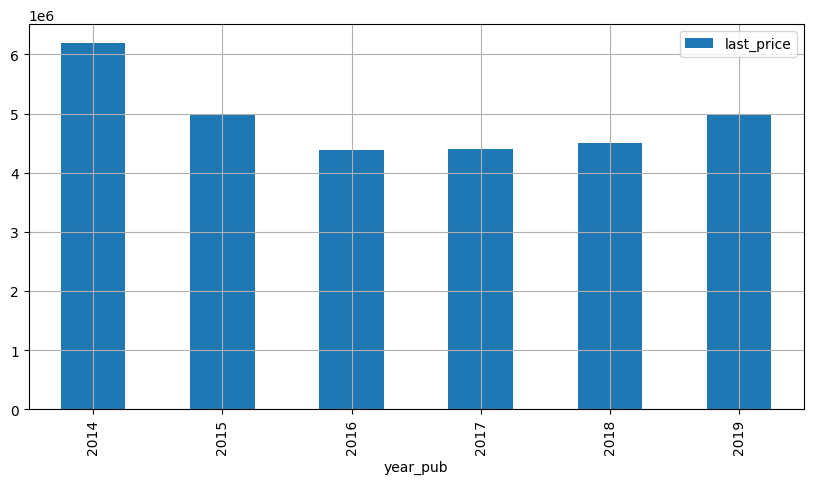

In [1756]:
ylims=(5000, 10000)
pivot_table_year_pub.plot(y='median', grid=True, kind='bar', figsize=(10,5));

В 2014ом цена квартир была значительно выше чем в последующие годы.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [1757]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_pub,month_pub,year_pub,floor_category,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,13.933
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.098
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95066.0,0,9,2018,другой,NaN


Формируем сводную таблицу

In [1758]:
locality_name_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc=['count', 'mean'])
locality_name_pivot_table.columns = ['count', 'mean']
locality_name_pivot_table = locality_name_pivot_table.sort_values('count', ascending = False).head(10)

In [1759]:
locality_name_pivot_table.head(10)

,count,mean
locality_name,,
Санкт-Петербург,14555,110890.838337
поселок Мурино,526,85029.522814
поселок Шушары,434,78265.702765
Всеволожск,389,68637.125964
Пушкин,350,102323.374286
Колпино,336,75370.017857
поселок Парголово,322,90448.400621
Гатчина,304,68919.434211
деревня Кудрово,283,92297.261484


Cамая высокая стоимость

In [1760]:
locality_name_pivot_table[locality_name_pivot_table['mean']==locality_name_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14555,110890.838337


Cамая низкая стоимость

In [1761]:
locality_name_pivot_table[locality_name_pivot_table['mean']==locality_name_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,232,58229.741379


В выборке из 10ти населенных пунктов, самая высокая стоимость жилья в Санкт-Петербурге, самая низкая стоимость жилья в Выборге.

### Вычислить как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге

Провожу дополнительную предобработку данных в столббце cityCenters_nearest_km

In [1762]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(1111111)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')


Формирую сводную таблицу, вывожу данные таблицы

In [1763]:
pivot_table_data_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=1111111'). \
pivot_table(index = 'cityCenters_nearest_km', values = 'price_m2', aggfunc = 'mean')

In [1764]:
pivot_table_data_km

,price_m2
cityCenters_nearest_km,
0,161311.983607
1,144920.312849
2,135902.135965
3,123038.980998
4,135512.180282
5,135286.004815
6,133171.822917
7,130097.825967
8,117553.289474


Строю гистограмму зависимоcти

<AxesSubplot:xlabel='cityCenters_nearest_km'>

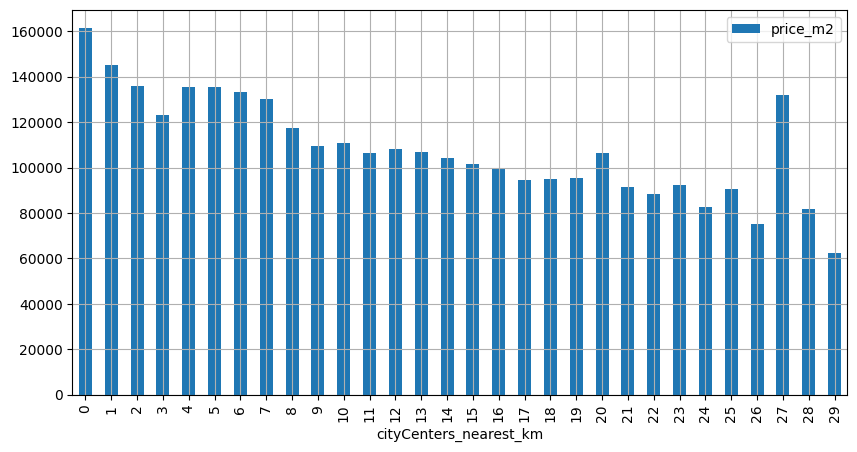

In [1765]:
pivot_table_data_km.plot(y='price_m2', grid=True, kind='bar', figsize=(10,5))

Чем дальше от центра тем квартиры дешевле, правда в 5 км от центра, есть какой то популярный район, где цены стремяться к ценам вцентре.

## Общий вывод

В рамках проекта был получен, изучен и обработан архив данных. 

Были обработаны пропущенные значения, заменены типы данных, где это необходимо, а также устранены дубликаты. 

Для проведения боле детального анализа в таблицу были посчитаны и добавлены следующие значения: 
- цена квадратного метра
- дата публикации объявления (неделя, месяц, год)
- добавлена категоризация этажей
- расстояние до интересующих объектов в километрах

Были определены и устранены аномалии в данных:
- площадь квартир
- цена квартир
- число комнат
- высота потолков

Был проведен исследовательский анализ объектов:
- общая площадь: лучше всего продаются квартиры с площадью от 30 до 75 кв.м.,
- жилая площадь: основной обьем продаж приходится на квартиры с жилой площадью от 15 до 50 кв.м.
- площадь кухни: лучше всего продаются квартиры где размер кухни от 5 до 14 кв.м.,
- цена объекта: основная стоимость продаваемых квартир составляет от 3млн. до 15млн., большую часть продаж составляют квартиры с ценой порядка 3млн., 7млн.
- количество комнат: больше всего покупают квартиры 1 - 2 комнатные, немного меньшей популярностью пользуются квартиры 3х комнатные, и совсем мало 4ех комнатные квартиры.
- высота потолков: большинство продаваемых квартир имеют потолки от 2.50м до 2.80. Больше всего продают квартиры с высотой потолков 2.60.
- этаж квартиры: больше всего спросом пользуются квартиры на 2ом - 6ом этажах.
- тип этажа квартиры («первый», «последний», «другой»): согласно графику 73.5% продаж приходятся на этажи отличные от первого и последнего.
- общее количество этажей в доме: как и следовало ожидать больше всего покупают квартиры в домах со стандартной этажностью (5, 9, 12, 16, 24), больше всего продается квартир в 5ти этажных домах.
- расстояние до центра города в метрах: основная доля продаж приходится на квартиры находящиеся на расстоянии 11-17 км.
- расстояние до ближайшего аэропорта: судя по графику данный фактор не особо влияет на покупку квартир, единственно, на удаленности 40км от аэропорта, популярность квартир начинает идти на спад.
- расстояние до ближайшего парка: люди предпочитают квартиры, чтобы в ближайших 500ах метрах находился парк.
- день и месяц публикации объявления: судя по диаграммам, нет особой разницы в какой день недели или в каком месяце осуществлять покупку
Были построены диаграммы и графики, по исследованию каждого из объектов были сделаны соответствующие выводы.

Проведено исследование как быстро продаются квартиры. В результате исследования были установлены временные рамки для определения нормы времени для продажи квартир (оно составляет 120 дней с момента публикации объявления), время быстрых продаж (40 дней), время долгих продаж (180 дней и выше), необычно долгой (500 дней и выше).

Проведено исследование, в котором были изучены факторы больше всего влияющие на общую (полную) стоимость объекта. 
Изучили зависимость цены от:
- общей площади (существенная зависимость);
- жилой площади (существенная зависимость);
- площади кухни (существенная зависимость);
- количества комнат (зависимость существует);
- этажа, на котором расположена квартира (первый, последний, другой) (нет зависимости);
- даты размещения (по дням недели и  месяцам особой зависимости не обнаружено, в 2014ом году квартиры стоили дороже)
Были построены диаграммы и графики, по исследованию каждого из объектов были сделаны соответствующие выводы.

Проведено исследование для выяснения стоимости квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. По проведенным исследованиям удалось определить что самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая в Выборге.

Произведены вычисления, зависимости стоимости квартиры от удаления ее от центра города в Санкт-Петербурге. В результате стало понятно, что чем дальше от центра города тем цена на недвижимость меньше, но это работает не для всех районов.

Построим таблицу корреляции для всего датафрейма, чтобы определить какие параметры сильнее всего влияют на общую стоимость квартиры.

<AxesSubplot:>

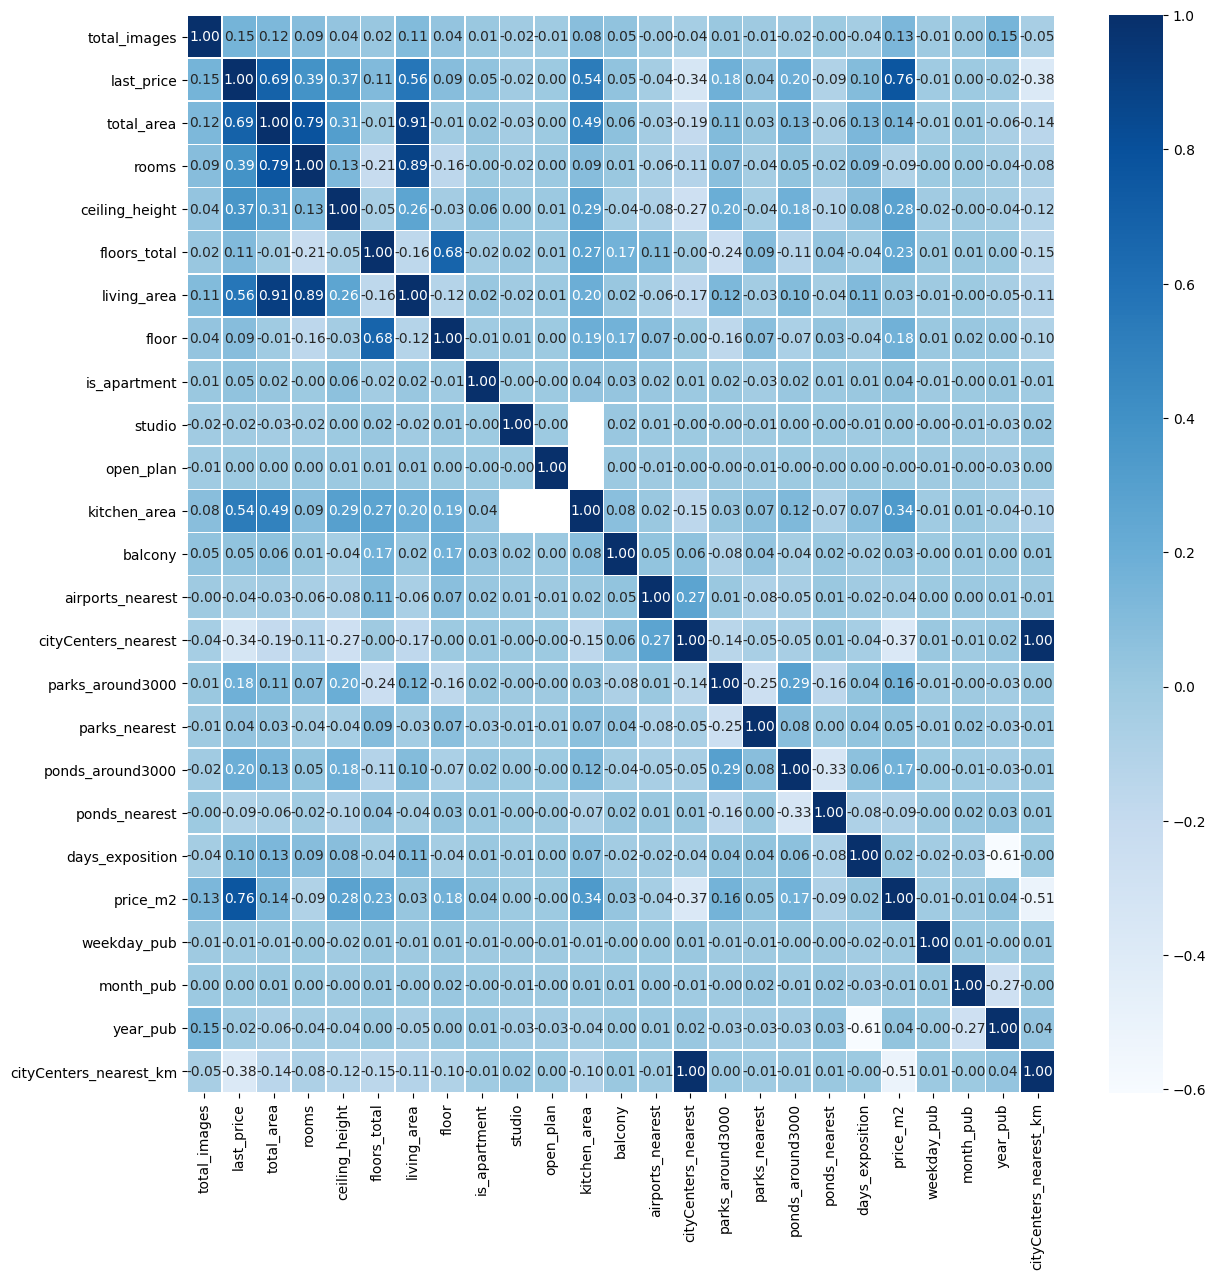

In [1766]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), cmap='Blues', annot=True, linewidth=.5, fmt='.2f')

Можно сделать следующие выводы: стоимость крвартиры сильнее всего зависит от цены за квадратный метр, от общей площади квартиры, от размера жилой площади, площади кухни, колличества комнат и от высоты потолков. Наличие парков и водоемов, в ближайшей доступности, также немного влияют на общую стоимость. 
Удаленность от центра оказывает влияние на цену, чем дальше от центра тем цена ниже.    